<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>
9. [Wrap-Up](#wrap-up)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

Check the number of rows and columns after importing data

In [4]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')
taxi_data = pd.concat([taxi_jan_2019])

In [5]:
print('The total number of rows is {}'.format(taxi_data.shape[0]))
taxi_data.head()

The total number of rows is 7667792


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

OBJECTIVES:

Understand the columns and only select the one we need
    
Check if there are potential problems with the data 

Investigate the cause of such problems,and the possible impacts to our analysis

Decide how to deal with those data with problems 

Metadata link: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [9]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

Only Choose the columns that I am interested in:

In [6]:
taxi_data=taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type','total_amount']]


In [33]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


The best way to explore data is to plot histogram for each column, and to see the range for each column

array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

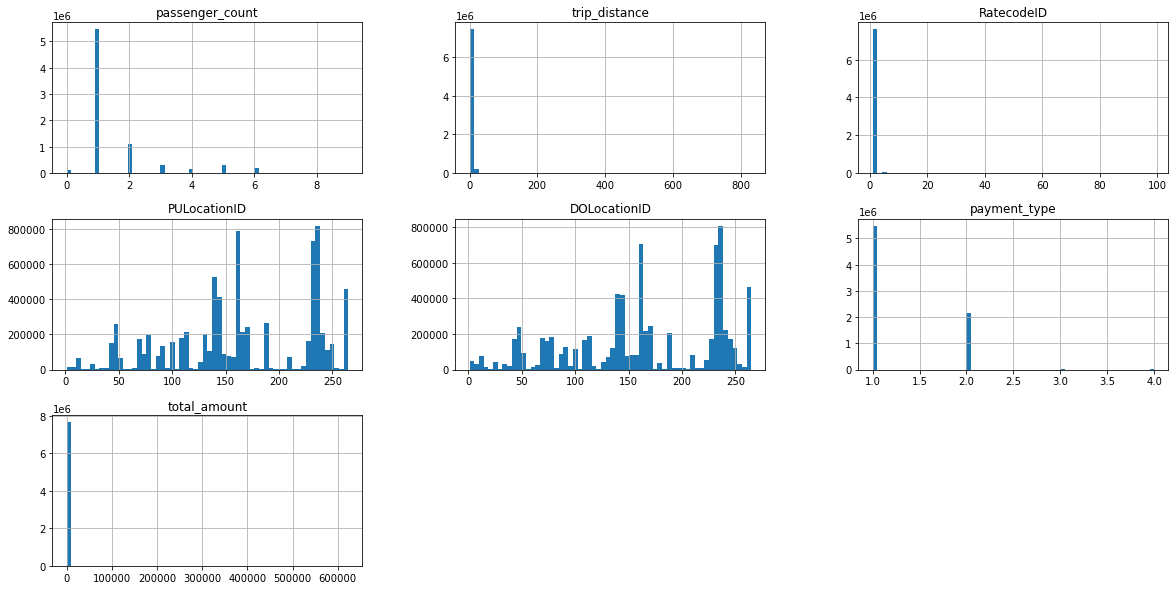

In [41]:
taxi_data.hist(bins=60,figsize=(20,10))

Potential Problem 1: RateCode should only range from 1 to 6, x axis should not stretch to a hundred

Potential Problem 2: Total_Amount may have extreme values, it's abnormal to see payment stretched to tens of thousand USD  

Potential Problem 3: Trip_Distance may have extreme values, couple hundred miles of trip distance is quite rare 

 

Lets count the number of occurance for each RateCode:

In [28]:
taxi_data['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

1=Standard rate
2=JFK
3=Newark
4=Nassau or Westchester 
5=Negotiated fare 
6=Group ride

Response to Potential Problem 1: 99 seems to be an error and also an outlier

Lets plot and check the outliers for total_amount 

<AxesSubplot:xlabel='index', ylabel='total_amount'>

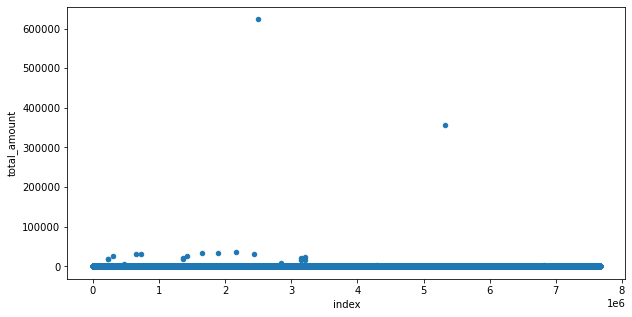

In [6]:
taxi_data.reset_index().plot.scatter('index','total_amount',figsize=(10,5))

Given there are sich a high outliers, I just want to see the plot for values under 1000

<AxesSubplot:xlabel='index', ylabel='total_amount'>

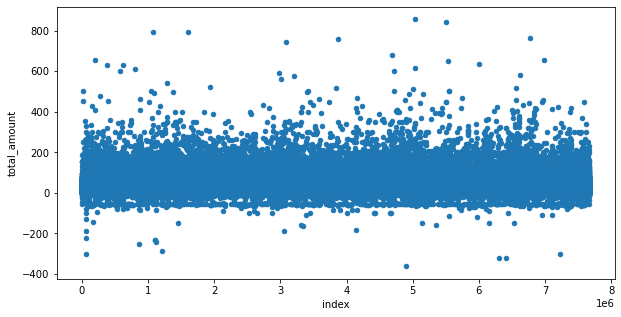

In [43]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot.scatter('index','total_amount',figsize=(10,5))

There are negative values too, which doesn't make sense

<AxesSubplot:xlabel='index', ylabel='total_amount'>

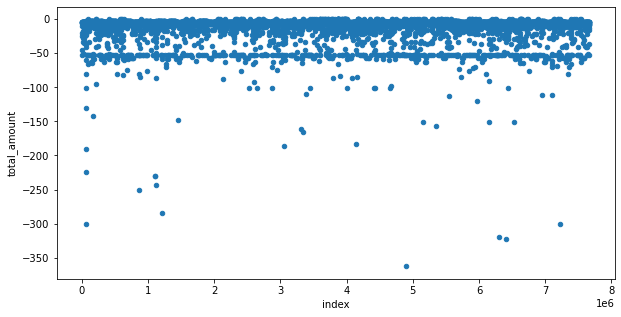

In [44]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot.scatter('index','total_amount',figsize=(10,5))

In [46]:
print('The number of rows that contains negative $ total_amount is {} rows'.format(taxi_data[taxi_data['total_amount']<0].shape[0])) 

The number of rows that contains negative $ total_amount is 7131 rows


Lets check the first five columns that has nagative $ total_amount

In [55]:
taxi_data[taxi_data['total_amount']<0].head().sort_values(by='total_amount', ascending=True)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8


It seems like most of the negative $ amount has payment types of 3 or 4, let's double check

In [202]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

1= Credit card 2= Cash
3= No charge 4= Dispute
5= Unknown 6= Voided trip

According to the metadata, Payment type 3 means 'No Charge', Type 4 means 'Dispute', that means they are not ordinary ocassions and something must have gone wrong. Those negative values is not helpful to our analysis and may even confuse our model.

Response to Potential Problem 2: Abnormal Payment types such as "no charge" and "dispute" is highly associated with negative $ payment

0.00     1431
0.01      320
0.02      213
0.03      193
0.04      157
         ... 
8.24        1
4.19        1
13.33       1
5.62        1
5.65        1
Name: trip_distance, Length: 662, dtype: int64


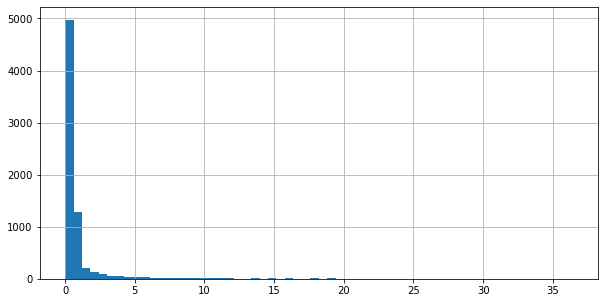

In [203]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))
print(taxi_data[taxi_data['total_amount']<0]['trip_distance'].value_counts())

There were 5000 records of trips traveled for zero trip_distance among the negative $total amount. 

It doesn't make sense to see anyone paying negative dollars for a cab. If that was because someone get into the cab and don't want to go anywhere, these records are not going to be useful and may confuse the model. 

It also doesn't make sense to see anyone paying zero dollars for a cab, lets do some analysis for zero $total amount 

In [204]:
print('The total number of zero $total amount is {}'.format(taxi_data[taxi_data['total_amount']==0].shape[0]))

The total number of zero $total amount is 1414


The total number of zero $total amount with zero trip distance is 1270 

0.00     1270
0.01        4
1.00        4
0.02        4
0.03        3
         ... 
17.60       1
1.20        1
1.33        1
1.75        1
3.20        1
Name: trip_distance, Length: 110, dtype: int64


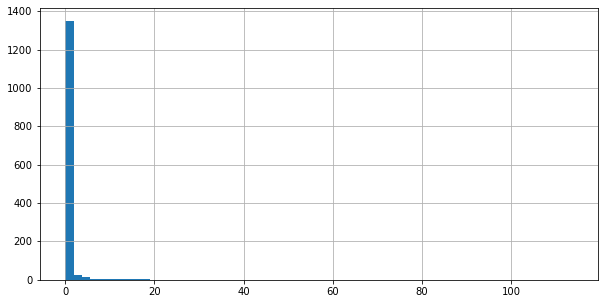

In [30]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60,figsize=(10,5))
print(taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts())

In [29]:
taxi_data[taxi_data['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [12]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

<a id='zero_distance'></a>

In [19]:
taxi_data[taxi_data['total_amount']==0]['PULocationID'].value_counts()

193    707
264    260
7       67
132     24
145     21
      ... 
213      1
216      1
219      1
224      1
1        1
Name: PULocationID, Length: 82, dtype: int64

In [201]:
taxi_data[taxi_data['total_amount']==0]['DOLocationID'].value_counts()  

193    866
264    266
7       79
145     21
152     15
      ... 
197      1
202      1
90       1
216      1
4        1
Name: DOLocationID, Length: 75, dtype: int64

In [206]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()  

0.00     1270
0.01        4
1.00        4
0.02        4
0.03        3
         ... 
17.60       1
1.20        1
1.33        1
1.75        1
3.20        1
Name: trip_distance, Length: 110, dtype: int64

There were 1270 records of trips traveled for zero trip_distance with zero $total amount.
Further analysis shows that Pickup location ID and dropoff location ID of 193 and 264 together had the highest number of zero dollar payment, and most of the riders used payment type 1 and 2 (Credit Card and Cash), meaning that they traveled for a very short distance that was within the same zone but the data could not show such a small distance/payment precisely, therefore giving the value of zero.

Finish looking into zeros and negatives, Let's take a look of the extremely high numbers too

<AxesSubplot:xlabel='index', ylabel='total_amount'>

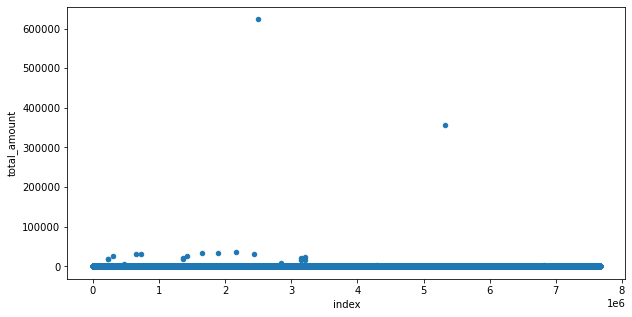

In [72]:
taxi_data.reset_index().plot.scatter('index','total_amount',figsize=(10,5))

The 2 data point doesn't make sense, how come it cost 40,000 to ride a taxi. Let's determine how many outliers should we filter out by setting an reasonable range of taxi fares, so that our model can have more reasonable inputs

In [42]:
taxi_data[taxi_data['total_amount']>500]['trip_distance'].value_counts()

0.00      29
0.10       4
19.90      2
15.90      1
21.70      1
1.11       1
110.04     1
1.00       1
107.80     1
8.55       1
123.42     1
0.50       1
9.70       1
113.58     1
14.64      1
100.80     1
214.01     1
2.40       1
16.60      1
17.50      1
5.90       1
8.50       1
131.47     1
1.50       1
Name: trip_distance, dtype: int64

29 rows having trip distance of 0 has a total amount greater than $500, that justifies the decision to drop data with trip distance of zero because they contain lots of error.

In [95]:
print('There are {} rows having a $total amount above $500USD'.format(taxi_data[taxi_data['total_amount']>500].shape[0]))
print('There are {} rows having a $total amount above $200USD'.format(taxi_data[taxi_data['total_amount']>200].shape[0]))

There are 56 rows having a $total amount above $500USD
There are 1166 rows having a $total amount above $200USD


1000 loss of data points sounds like a good compromise and it will make more sense to limit the range that we are trying to predict how much people will pay in each region

In [96]:
taxi_data['total_amount'].mean()

15.68222215901336

Since the average just just over 15, we can agree to cut from $200 level

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

OBJECTIVES:

Filtering out the outliers 

Check if there are any missing values and duplicates 


I determine to eliminate all the rows with total_amount of zeros, negative numbers and above $200

In [43]:
taxi_data_filtered=taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [49]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7667792, 9)


(7659490, 9)

In [60]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [61]:
taxi_data_filtered.duplicated().sum()

0

For this phase, I have filtered the data and checked that there is no missing values and duplicates

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

OBJECTIVES:

Transform the data into the formats suitable for analysis

Make sure the datatypes are appropriate

Categorize the columns

In [91]:
taxi_data_prepared=taxi_data_filtered.copy()

In [104]:
taxi_data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7659490 entries, 0 to 7667791
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   RatecodeID             object        
 5   PULocationID           object        
 6   DOLocationID           object        
 7   payment_type           object        
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 584.4+ MB


In [88]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime']=pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime']=pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [98]:
##an easier way to do that
taxi_data_prepared['tpep_pickup_datetime']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'])
taxi_data_prepared['tpep_dropoff_datetime']=pd.to_datetime(taxi_data_prepared['tpep_dropoff_datetime'])

In [102]:
taxi_data_prepared['RatecodeID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID']=taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID']=taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type']=taxi_data_prepared['payment_type'].astype(str)

In [131]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
transaction_date         datetime64[ns]
transaction_year                  int64
transaction_month                 int64
transaction_day                   int64
transaction_hour                  int64
dtype: object

Transforming variables into the formats we need them

In [107]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


I want to also split the pickup datetimes into seperate columns, so that they may feed into the model easier

In [109]:
taxi_data_prepared['transaction_date']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']=taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month']=taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']=taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']=taxi_data_prepared['tpep_pickup_datetime'].dt.hour

taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


This dataset should not include months other than January and years other than 2019.
But the above table showed 2018 and Nov/Dec

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

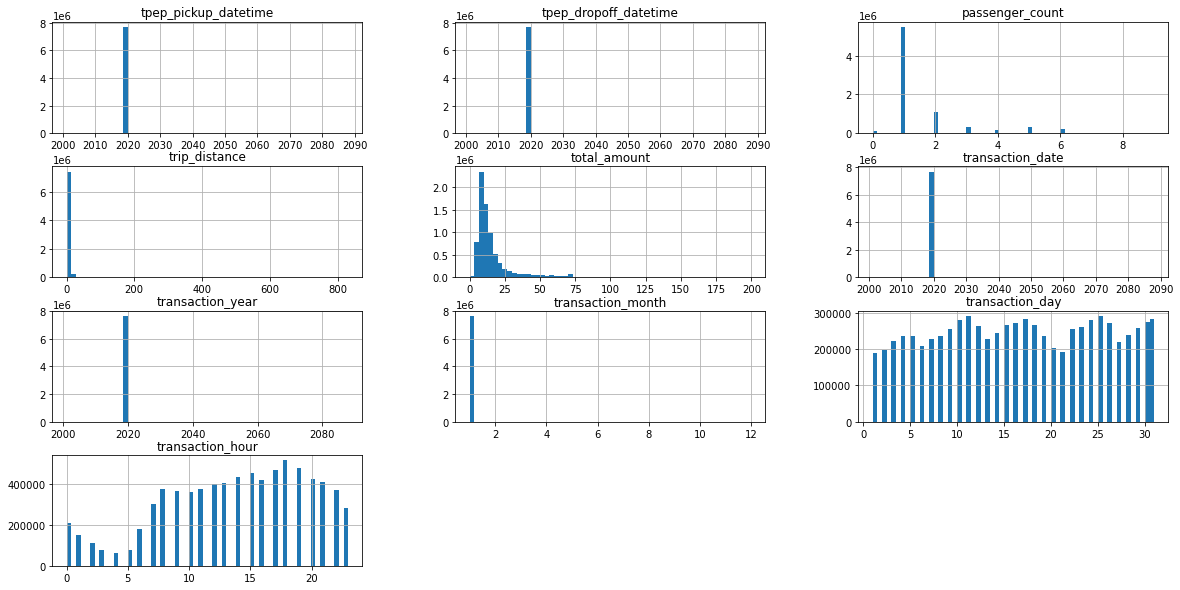

In [119]:
taxi_data_prepared.hist(figsize=(20,10),bins=60)

In [126]:
taxi_data_prepared['transaction_year'].value_counts()

2019    7659048
2018        365
2009         50
2008         22
2003          2
2088          2
2001          1
Name: transaction_year, dtype: int64

In [127]:
taxi_data_prepared['transaction_month'].value_counts()

1     7659008
12        377
2          73
11         10
4           6
7           6
3           5
6           2
5           1
8           1
9           1
Name: transaction_month, dtype: int64

Let's filter only 2019 and January

In [130]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_month']==1]
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]

Noting down the categorical and numerical columns 

In [132]:
categorical_columns=['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns=['trip_distance','total_amount']
all_needed_columns=categorical_columns+numerical_columns

In [138]:
main_taxi_df=taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()


(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [173]:
##just want to check the total number of pickups at location 151
ID_151=main_taxi_df['PULocationID']=='151'
main_taxi_df[ID_151].shape[0]

69541

I'll aggregate the data, that means same hour within the region and day will be aggregated and averaged. I'll also add a column to have the numbers of aggregated transactions for reference

In [192]:
taxi_grouped_by_region=main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['transactions_aggregated']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape) 
taxi_grouped_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


This table is cleaned. It has the correct year, month; and is free from duplicates, missing values, outliers, negative values. The only potential problem is the zero trip_distance because the data doesn't have accurate measure for low trip distance within the same region, as stated above.
 [zero_distance](#zero_distance)

<AxesSubplot:>

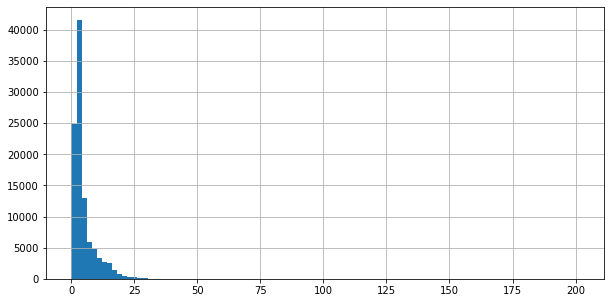

In [196]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<AxesSubplot:>

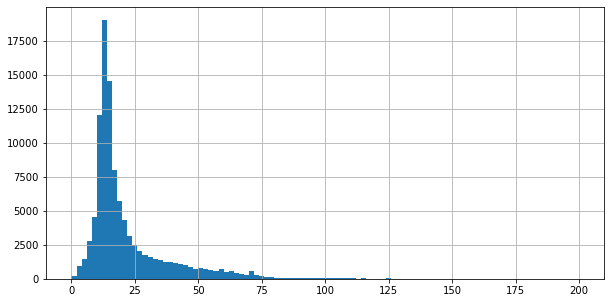

In [197]:
taxi_grouped_by_region['total_amount'].hist(bins=100,figsize=(10,5))

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

## 7.1. Decision tree <a id='decision_tree'></a>

## 7.2. Random forest <a id='random_forest'></a>

## 7.3. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

# 9. Wrap-Up <a id='wrap-up'></a>
[Back to top](#table_of_contents)